# Quantum Multiplexer, Demultiplexer

https://www.youtube.com/watch?v=FKvnmxte98A&ab_channel=NesoAcademy

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

C:\Users\jefai\AppData\Local\Temp\ipykernel_20096\912229180.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [1]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random

In [3]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [4]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [5]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(circ, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [6]:
def makeCirc(n, m):
    initState = ''
    for i in range(0, n-m):
        initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [7]:
circ = makeCirc(6, 0)
#getBloch(circ)

100011


In [8]:
circ.cswap(1,2,3)
circ.cswap(1,4,5)
circ.cswap(0,3,5)

for i in range(2,6):
    circ.measure(i,i)

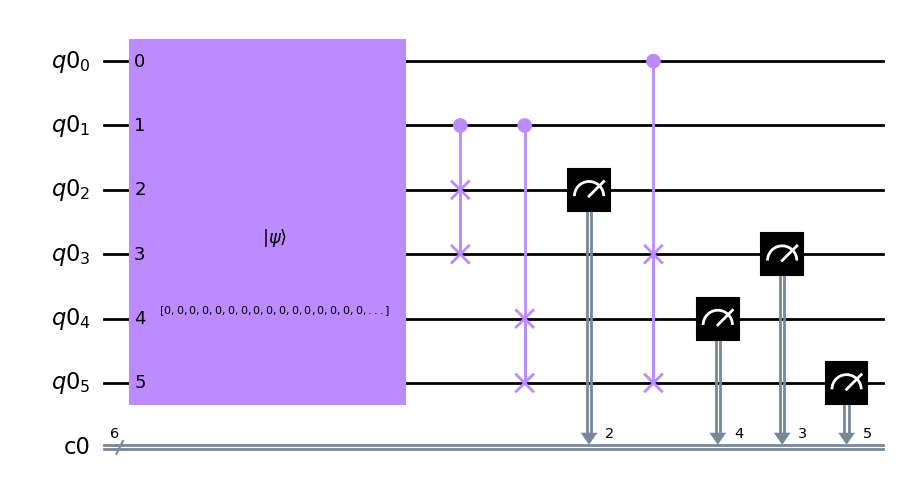

In [9]:
circ.draw('mpl')

In [11]:
getMeasure(circ,1)[::-1] # Retorna el valor d ela medición al reves

['011000']

Podemos crear un circuito que sea un demultiplexer:


In [12]:
circ = QuantumCircuit(6)
circ.cswap(1,2,3)
circ.cswap(1,4,5)
circ.cswap(0,3,5)

In [13]:
mux = circ.to_gate(label='Multiplexer') # Esto me retorna una compeurta encapsulada


In [20]:
circuit_mux = QuantumCircuit(10)
circuit_mux.append(mux,[1,2,3,4,5,6]) # Lo peudo poner donde se requiera.


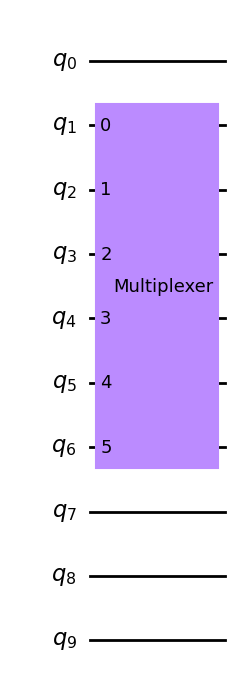

In [21]:
circuit_mux.draw('mpl')

Podemos crear un demultiplexer también: y encpasularlo.



In [24]:
circ_demux = QuantumCircuit(6)
circ_demux.cswap(1,2,3)
circ_demux.cswap(0,2,4)
circ_demux.cswap(0,3,5)

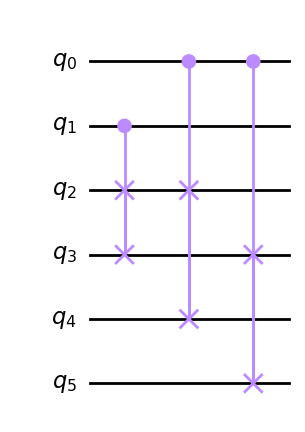

In [26]:
circ_demux.draw('mpl')

In [27]:
demux = circ_demux.to_gate(label='Demultiplexer')


In [28]:
circuit_demux = QuantumCircuit(10)
circuit_demux.append(demux, [0,1,2,3,4,5])

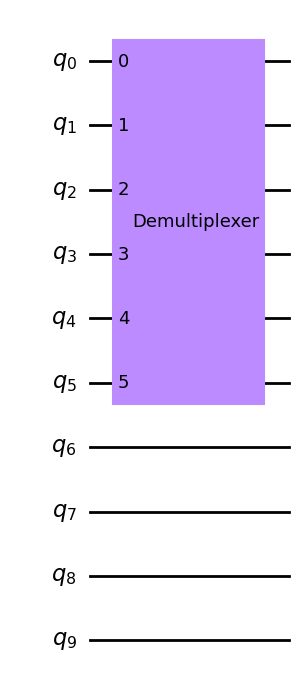

In [29]:
circuit_demux.draw('mpl')